In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# reading the csv file using read_csv from pandas
obesity_df = pd.read_csv("ObesityDataset.csv")
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# Checking for data types of the column
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
# Checking the mean, median and many more stats of column.
obesity_df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [5]:
# Check for any null values in the dataframe.
obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Checking for duplicates values in the dataframe. 
obesity_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [7]:
# Dropping duplicates values. 
obesity_df = obesity_df.drop_duplicates()
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


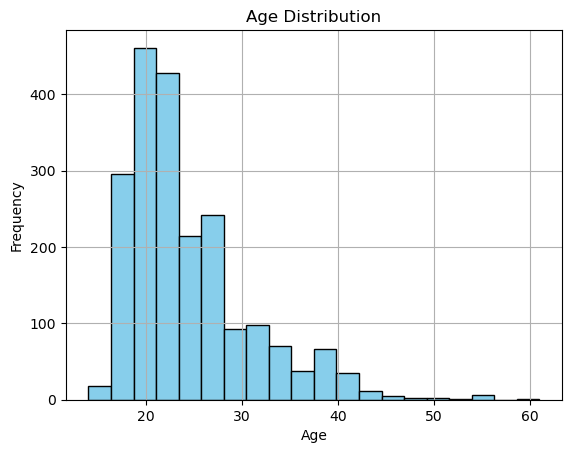

In [8]:
# To see the distribution of numerical features like Age, Height, Weight etc.
obesity_df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

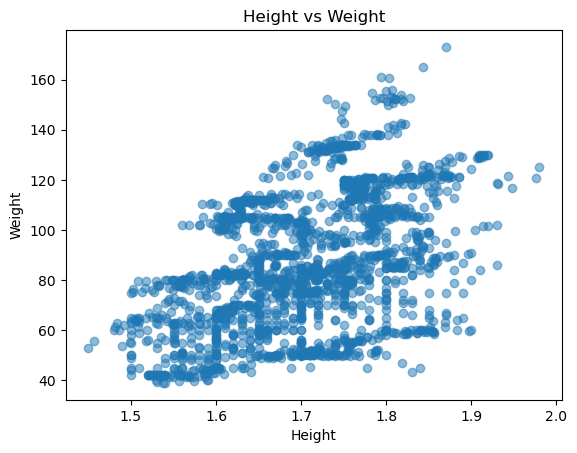

In [9]:
# To observe relationships between numerical features. Height vs. Weight
plt.scatter(obesity_df['Height'], obesity_df['Weight'], alpha=0.5)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [10]:
# Renaming columns.
obesity_df = obesity_df.rename(columns ={"FAVC":"High_calorie_consumption",
                                         "FCVC":"Veg_consumption",
                                         "NCP":"No_of_meals",
                                         "CH2O":"Water_consumption",
                                         "FAF":"Physical_activity",
                                         "CALC":"Alcohol_consumption",
                                         "NObeyesdad":"Obesity_Cat"})
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,TUE,Alcohol_consumption,MTRANS,Obesity_Cat
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# Selecting the target column 
target_graph = obesity_df['Obesity_Cat']
target_graph

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: Obesity_Cat, Length: 2087, dtype: object

In [12]:
# Finding the value count of target column
count = target_graph.value_counts()
count

Obesity_Cat
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

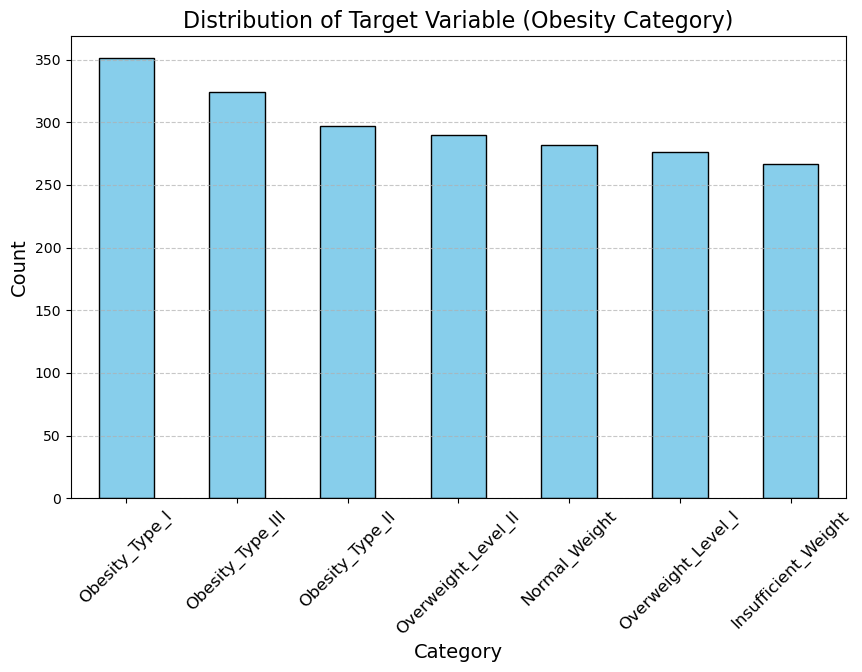

In [13]:
# Plotting the graph of the target column with their value count. 
plt.figure(figsize=(10, 6))
count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable (Obesity Category)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Encode categorical features
categorical_columns = obesity_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    obesity_df[col] = encoder.fit_transform(obesity_df[col])
    label_encoders[col] = encoder
    
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,TUE,Alcohol_consumption,MTRANS,Obesity_Cat
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [15]:
# checking what numeric value is assigned.
for col, encoder in label_encoders.items():
    print(f"Column: {col}")
    for class_index, class_label in enumerate(encoder.classes_):
        print(f"  {class_label}: {class_index}")


Column: Gender
  Female: 0
  Male: 1
Column: family_history_with_overweight
  no: 0
  yes: 1
Column: High_calorie_consumption
  no: 0
  yes: 1
Column: CAEC
  Always: 0
  Frequently: 1
  Sometimes: 2
  no: 3
Column: SMOKE
  no: 0
  yes: 1
Column: SCC
  no: 0
  yes: 1
Column: Alcohol_consumption
  Always: 0
  Frequently: 1
  Sometimes: 2
  no: 3
Column: MTRANS
  Automobile: 0
  Bike: 1
  Motorbike: 2
  Public_Transportation: 3
  Walking: 4
Column: Obesity_Cat
  Insufficient_Weight: 0
  Normal_Weight: 1
  Obesity_Type_I: 2
  Obesity_Type_II: 3
  Obesity_Type_III: 4
  Overweight_Level_I: 5
  Overweight_Level_II: 6


In [16]:
# Compute the correlation matrix
correlation_matrix = obesity_df.corr()
correlation_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,TUE,Alcohol_consumption,MTRANS,Obesity_Cat
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391
High_calorie_consumption,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023
Veg_consumption,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728
No_of_meals,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,-0.072316,0.005009,0.075335,-0.020461,0.127816,0.015693,-0.082985,-0.043648,-0.088235
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.072316,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341


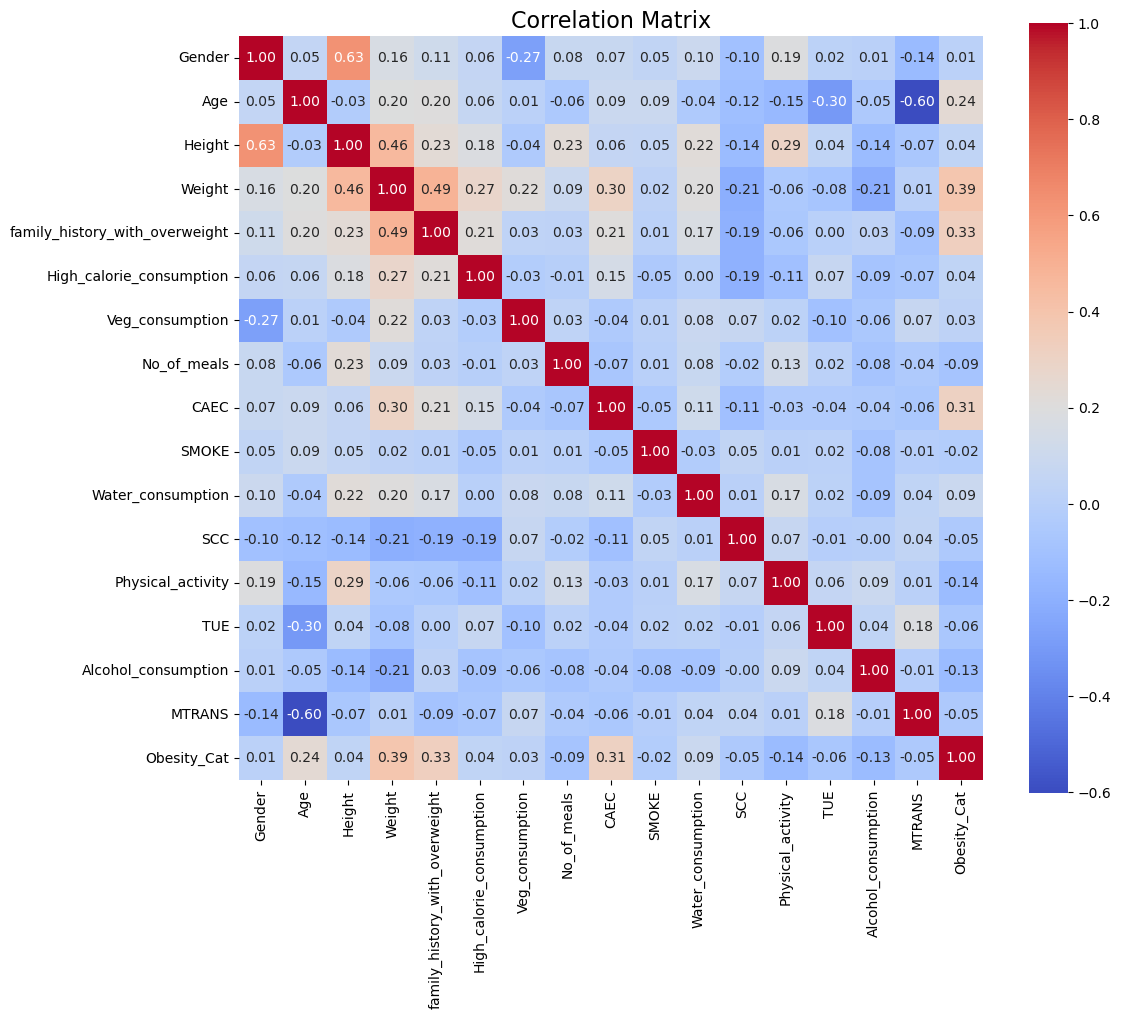

In [17]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [18]:
# Define the target
target = obesity_df['Obesity_Cat']
target

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: Obesity_Cat, Length: 2087, dtype: int32

In [19]:
# Define the features
features = obesity_df.drop(columns=['Obesity_Cat'])
features

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,TUE,Alcohol_consumption,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [20]:
# Dropping the TUE column. 
features = features.drop(['TUE'], axis = 1)

In [21]:
# first five rows in features after dropping TUE 
features.head()

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,Alcohol_consumption,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,2,3


In [22]:
# last five rows in features after dropping TUE 
features.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_consumption,Veg_consumption,No_of_meals,CAEC,SMOKE,Water_consumption,SCC,Physical_activity,Alcohol_consumption,MTRANS
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,2,3
2110,0,23.664709,1.738836,133.472641,1,1,3.0,3.0,2,0,2.863513,0,1.026452,2,3


In [23]:
# Assigning the features and target. 
x = features
y = target

In [24]:
# Initialize the scaler to standardize features to mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x) # Apply standardization to the feature data 'x'

In [25]:
# Split the data into training (80%) and testing (20%) sets, ensuring reproducibility with random_state=42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Train the Logistic Regression model on the training data (x_train and y_train)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train, y_train)

E:\IDE and text editors\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Use the trained Logistic Regression model to predict the target values for the test set
y_pred = logistic_model.predict(x_test)

# Calculate the accuracy of the model by comparing the predicted values (y_pred) with the actual target values (y_test)
logistic_reg = accuracy_score(y_test, y_pred)
logistic_reg

0.8014354066985646

In [28]:
# Generating a classification report that includes precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85        59
           1       0.78      0.51      0.61        61
           2       0.83      0.83      0.83        70
           3       0.93      1.00      0.96        64
           4       0.98      1.00      0.99        60
           5       0.62      0.69      0.66        55
           6       0.60      0.63      0.61        49

    accuracy                           0.80       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.80      0.80       418



In [29]:
# Train the Random Forest Classifier on the training data (x_train and y_train)
random_fmod = RandomForestClassifier(n_estimators=100, random_state=42)
random_fmod.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict and evaluate
y_pred_rf = random_fmod.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf

0.9449760765550239

In [31]:
# Generating a classification report that includes precision, recall, f1-score, and support
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.84      0.87      0.85        61
           2       0.99      0.97      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.87      0.87      0.87        55
           6       0.92      0.96      0.94        49

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



In [32]:
# Train the KNN Model on the training data (x_train and y_train)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
# Predict and evaluate
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

accuracy_knn

0.8827751196172249

In [34]:
# Generating a classification report that includes precision, recall, f1-score, and support
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        59
           1       0.85      0.54      0.66        61
           2       0.90      0.94      0.92        70
           3       1.00      1.00      1.00        64
           4       0.98      1.00      0.99        60
           5       0.80      0.85      0.82        55
           6       0.80      0.84      0.82        49

    accuracy                           0.88       418
   macro avg       0.88      0.88      0.87       418
weighted avg       0.88      0.88      0.88       418



In [35]:
# New input for classification
new_pd = pd.DataFrame({
    'Gender' : [1],
    'Age' : [20],
    'Height' : [1.65],
    'Weight' : [65],
    'family_history_with_overweight' : [0],
    'High_calorie_consumption' : [1],
    'Veg_consumption' : [2],
    'No_of_meals': [4],
    'CAEC' : [2],
    'SMOKE' : [0],
    'Water_consumption' : [2],
    'SCC' : [0],
    'Physical_activity' : [0],
    'Alcohol_consumption' : [3],
    'MTRANS' : [2] 
})
prediction = random_fmod.predict(new_pd)

predicted_class_index = prediction[0]  # Numeric prediction
label_encoder = label_encoders['Obesity_Cat']  
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

print(f"The obesity classification is: {predicted_class_name}")

The obesity classification is: Normal_Weight
